In [1]:
# ============================================
# 📌 1. Mount Google Drive
# ============================================
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# ============================================
# 📌 2. Install dependencies
# ============================================
!pip install librosa scikit-learn joblib matplotlib seaborn


In [3]:
# ============================================
# 📌 3. Imports
# ============================================
import librosa, os, glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [4]:
# ============================================
# 📌 4. Set dataset path (inside Drive)
# ============================================
base_dir = "/content/drive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24/"

# Quick check
sample_files = glob.glob(base_dir + "Actor_01/*.wav")[:5]
print("Sample files:", sample_files)


Sample files: ['/content/drive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-02-01-01.wav', '/content/drive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-03-01-02-02-01.wav', '/content/drive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-02-01-02-01-01.wav', '/content/drive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-04-02-01-01-01.wav', '/content/drive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-02-01.wav']


In [5]:
# ============================================
# 📌 5. Feature extractor
# ============================================
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=3, offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

emotions = {
    "01":"neutral", "02":"calm", "03":"happy", "04":"sad",
    "05":"angry", "06":"fearful", "07":"disgust", "08":"surprised"
}


In [7]:
# ============================================
# 📌 6. Load dataset
# ============================================
X, y = [], []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".wav"):
            emotion_code = file.split("-")[2]
            if emotion_code in emotions:
                emotion = emotions[emotion_code]
                file_path = os.path.join(root, file)
                features = extract_features(file_path)
                X.append(features)
                y.append(emotion)

X = np.array(X)
y = np.array(y)

print(f"✅ Loaded {len(X)} samples across {len(set(y))} emotions: {set(y)}")


✅ Loaded 1440 samples across 8 emotions: {np.str_('fearful'), np.str_('disgust'), np.str_('sad'), np.str_('happy'), np.str_('angry'), np.str_('calm'), np.str_('surprised'), np.str_('neutral')}


In [8]:
# ============================================
# 📌 7. Train/Test split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


Train size: 1152, Test size: 288


In [9]:
# ============================================
# 📌 8. Train model
# ============================================
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("🔎 Classification Report:\n")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")


🔎 Classification Report:

              precision    recall  f1-score   support

       angry       0.71      0.76      0.73        38
        calm       0.56      0.95      0.71        38
     disgust       0.60      0.55      0.58        38
     fearful       0.52      0.59      0.55        39
       happy       0.67      0.41      0.51        39
     neutral       0.70      0.37      0.48        19
         sad       0.56      0.39      0.46        38
   surprised       0.67      0.74      0.71        39

    accuracy                           0.61       288
   macro avg       0.62      0.60      0.59       288
weighted avg       0.62      0.61      0.60       288

✅ Accuracy: 0.61


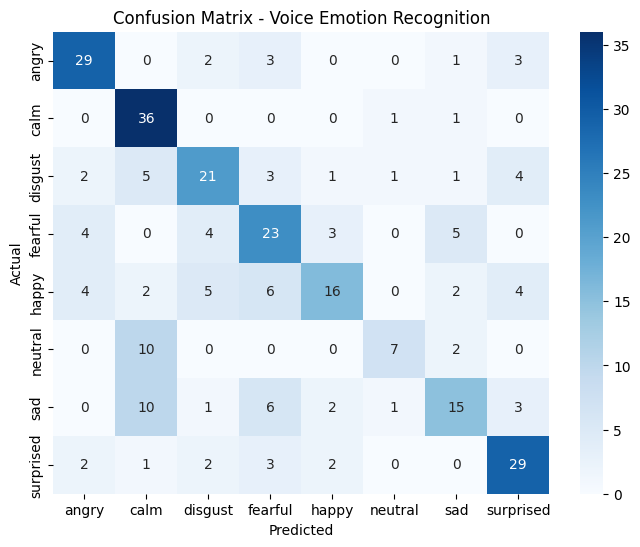

In [10]:
# ============================================
# 📌 9. Confusion Matrix
# ============================================
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Voice Emotion Recognition")
plt.show()


In [12]:
# ============================================
# 📌 10. Save model back to Google Drive
# ============================================
output_path = "/content/drive/MyDrive/RAVDESS/voice_emotion_model.pkl"
joblib.dump(model, output_path)
print(f"💾 Model saved at: {output_path}")


💾 Model saved at: /content/drive/MyDrive/RAVDESS/voice_emotion_model.pkl


In [13]:
from google.colab import files

# Replace with the actual path to your file in Google Drive
output_path = "/content/drive/MyDrive/RAVDESS/voice_emotion_model.pkl"

try:
    files.download(output_path)
except FileNotFoundError:
    print(f"File not found at {output_path}. Please check the path.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>